## 01. 결측치
- 결측치(키보드로 입력된 값 중 컴퓨터가 모르는 값, 즉 아무것도 없음, 문자코드에 할당 안된 값)
- 결측치는 머신러닝, 딥러닝에서 에러의 가장 큰 요인
- Null값, NA값
- 확인 방법
    1. df.isnull().sum(), df.isna().sum()
    2. sns.heatmap(df.isnull()) :  결측치는 흰색(미색)으로 보임

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
0


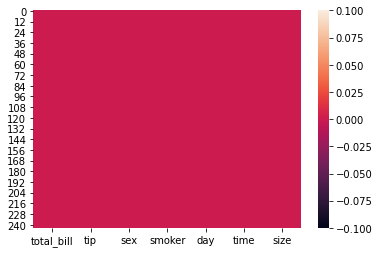

In [13]:
print(df.isna().sum())
print(df.isnull().sum().sum())
sns.heatmap(df.isnull()) # 결측치는 흰색(미색)으로 보임
plt.show()

In [4]:
tmp = df.replace(2, np.nan)

sum = 0
for i in tmp['size']:
    sum += i
print(sum)

nan


In [5]:
tmp.isna().sum()

total_bill      0
tip            33
sex             0
smoker          0
day             0
time            0
size          156
dtype: int64

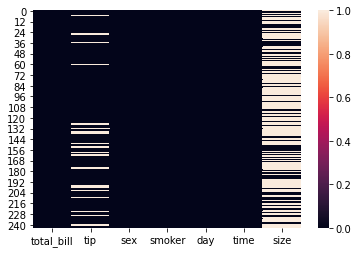

In [7]:
sns.heatmap(tmp.isnull())
plt.show()

- 결측치 처리 방법(정답은 없음)
    - 방법1. 삭제
    - 방법2. 대체(평균, 중앙값, 최빈값 등)
    - 방법3. 임의값으로 대체
    - 방법4. 미래 예측값으로 대체

In [ ]:
xx = tmp['size'].values # 자료형: numpy array, numpy는 pandas보다 계산이 빠르기 때문에 주로 데이터 계산 후 df.values로 저장!
np.std(xx*2)

## 02. 범주형(카테고리) 데이터 처리

- 문자자료가 x, y변수로서 사용되어서 예측분류하는 ML에 사용하려면 반드시 숫자값으로 변경해야 함
- 문자자료는 의미없는 텍스트자료와 어떤 분류로서 집계하는 의미가 있는 명목형 변수로 나뉨
- 명목형 변수는 보통 x값으로 많이 사용되며, 이때 숫자로 변경해야 함.(더미변수화)

In [17]:
# P. 192~200페이지 내용 중요
x = [1,2,3,4]
y = ['a', 'b', 'c', 'd']

w=3;b=2
print(np.array(x)*2)
np.array(y)*2

[2 4 6 8]


UFuncTypeError: ignored

- array와 list의 차이점
    - list는 기억장소로서 같은 곳에 모인 자료의 형이 일치하지 않아도 되고, 자료의 원소갯수가 일치하지 않아도 됨. 연산 불가능(+는 연결, *는 반복)
    - array는 연산가능한 데이터 가로 세로의 원소집합, 같은 집합체에는 자료형과 원소갯수가 일치해야 함.



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


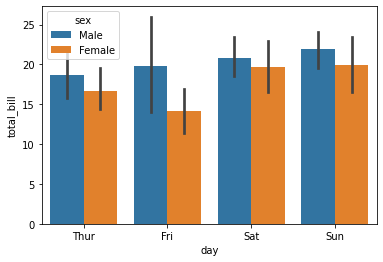

In [20]:
# 아래차트를 통해서 얻을 수 있는 의미
# 요일이라는 명목형변수(문자형변수)와 성별이라는 명목형 변수에 따라 팁은 다르다.
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=df)

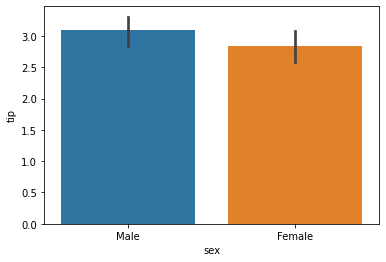

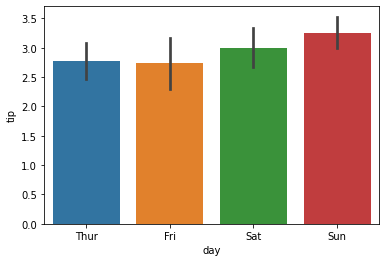

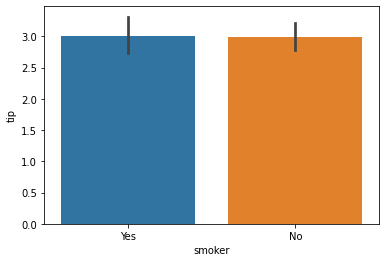

In [21]:
def barplot(var):
    ax = sns.barplot(x=var, y="tip", data=df)

varList=['sex', 'day', 'smoker']
for i in varList:
    barplot(i)
    plt.show()

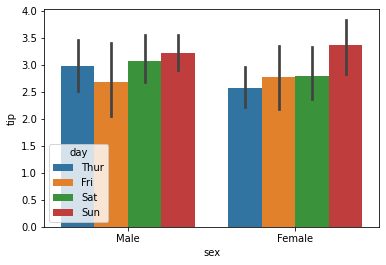

In [23]:
def barplot2(var1, var2):
    ax = sns.barplot(x=var1, y="tip", hue=var2, data=df)

barplot2('sex', 'day')

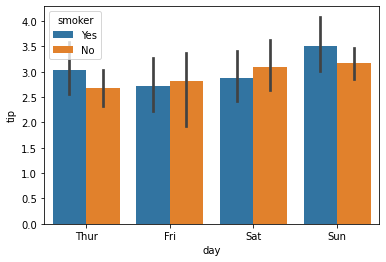

In [25]:
def barplot2(var1, var2):
    ax = sns.barplot(x=var1, y="tip", hue=var2, data=df)

barplot2('day', 'smoker')

- 더미변수화(P.194)

In [29]:
# day값의 unique값을 각각의 변수로 제작하여서 해당하는 변수에 1값을 넣음
# 더미변수를 만드는 방법은 매우 다양
print(df['day'].unique())
pd.get_dummies(df['day']).head() # 방법1 : pd.get_dummies

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']


,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [34]:
pd.get_dummies(data=df, columns=['day'], prefix='d').head()

,total_bill,tip,sex,smoker,time,size,d_Thur,d_Fri,d_Sat,d_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1


- 더미변수나 원핫인코딩이나 모두 문자를 숫자로 변환하는 방법
- x변수는 일반적으로 더미변수화 시킴
- y변수는 원핫인코딩을 해야 함.

In [35]:
# 원핫인코딩은 여러개의 비트 중 한 개에 힘을 주는 것을 의미함.
# 더미변수와 차이점은 더미변수는 여러개의 필드
# 원핫인코딩은 한 개의 필드

# 원핫인코딩하기 전에 숫자로 변환하는 과정
# 사용자가 일일이 if로 작업해도 됨
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x = df.day
encoder.fit(x)
x=encoder.transform(x)
x

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])